# Regularization and Model Selection

Regularization is a technique in machine learning to control model complexity and prevent overfitting. Typically involves adding an additional term, called a regularizer and denoted by $R(\theta)$, to the training loss/cost function.
$$
J_{\lambda}(\theta) = J(\theta) + \lambda R(\theta)
$$
- $J_{\lambda}$ - regularized loss
- $\lambda \geq 0$ - regularization parameter

Here, $R(\theta)$ is typically some measure of complexity of model $\theta$, $\therefore$ by using a regularized cost function we aim to find the model that fits both the data (minimize $J(\theta)$) and has smaller complexity i.e. $R(\theta)$.

The regularization parameter acts as a tradeoff between the two objectives - 

|$\lambda$| Implication|
|-------|--|
|$\lambda = 0$| Unregularized loss function i.e. minimizing only the $J(\theta)$.|
|$\lambda \approx 0$| Again effectively minimizing the loss function $J(\theta)$ with regularization term acting as a tie breaker when multiple solutions with similar loss values exists.|
|$\lambda >> 0$|The original loss is not effective anymore leading to high bias of the model.|

We have stated that $R(\theta)$ is the regularization term measuring the complexity of the model. But we have not explicitly defined the term. Their are many ways of measuring the regularization of the model - 
- Number of parameters - Larger number of parameters, larger the regularization. But this is very vague since the model can have a large number of parameters but most of them can be non-zero.
- Norm of parameters - Typically $L_i$ norms are used to measure the complexity.
- Lipschitzness/Smoothness of the curve.

The most common way to regularize the model is to add the norm of the parameters to the model. Commonly used norms are - 
- L0 norm - $R(\theta) = ||\theta||_0$ - Number of non-zero parameters in the model. One main drawback of this type of regularization is that it is not differentiable.
- L1 norm - $R(\theta) = ||\theta||_1$ - Sum of absolute values of the parameters. A good surrogate for the L0 norm as it is differentiable and is *convex approximation for the L0 norm*. [read more here](https://www.cs.utep.edu/vladik/2013/tr13-18.pdf)
$$
L_0(\theta) = \Sigma_{i=1}^n|\theta_i|
$$

The L1 and L0 norm deal with the sparsity of the model and often used for the feature selection procedure. If we want to use all the features of the given model but control the magnitude of contribution for each model, we can use the L2 norm.
- L2 norm - $R(\theta) = \frac{1}{2}||\theta||_2^2$ - Sum of squares of the parameters. This regularization technique is referred to as weight decay as it decays the weight parameter $\theta$ by a factor of $1 - \eta\lambda$ - 
$$\begin{align*}
\theta \leftarrow \theta - \eta \nabla J_{\lambda}(\theta) &=  \theta - \eta(\lambda \theta  - \nabla J(\theta)) \\
&= (1 - \eta\lambda)\theta - \eta\nabla J(\theta)
\end{align*}
$$

Where - 
- $\eta$ - learning rate
- $\lambda$ - regularization parameter

While encouraging simpler models, the regularization also imposes inductive biases into the model. If the the prior belief if that model is sparse and we apply the L1 norm, if the strength of regularization is too high, the model may underfit and have high bias due to our strong prior beliefs.

The two norms L1 and L2, when applied to linear models, give rise to some standard models  - 
### LASSO (Least Absolute Shrinkage and Selector Operator)
- Uses L1 regularization penalty.
- Tackles feature selection
- The Loss function is given by - 
$$
J_{\lambda}(\theta) = J_{\theta} + \lambda\Sigma_{i=1}^{d}|\theta_i|
$$

### Ridge Regression
- Uses L2 norm 
- Tackles multicollinearity
- The Loss function is given by - 
$$
J_{\lambda}(\theta) = J_{\theta} + \lambda\Sigma_{i=1}^{d}\theta_i^2
$$
or
$$
J_{\lambda}(\theta) = J_{\theta} + \lambda\theta^T\theta
$$

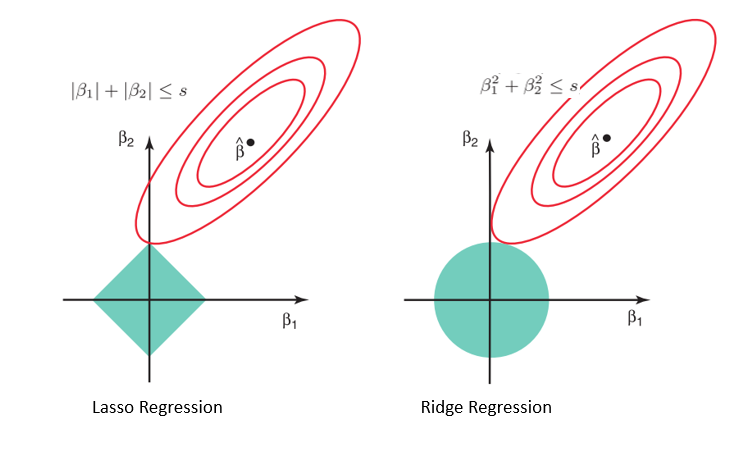

We can also use a combination of L1 and L2 norms

### Elastic Net Regression 
- Uses a weighted average of L1 and L2 norm
- Loss function is given by - 
$$
J_{\lambda}(\theta) = J_{\theta} + \lambda\Sigma_{i=1}^{d}(\alpha\theta_i^2 + (1 - \alpha)|\theta_i|)
$$

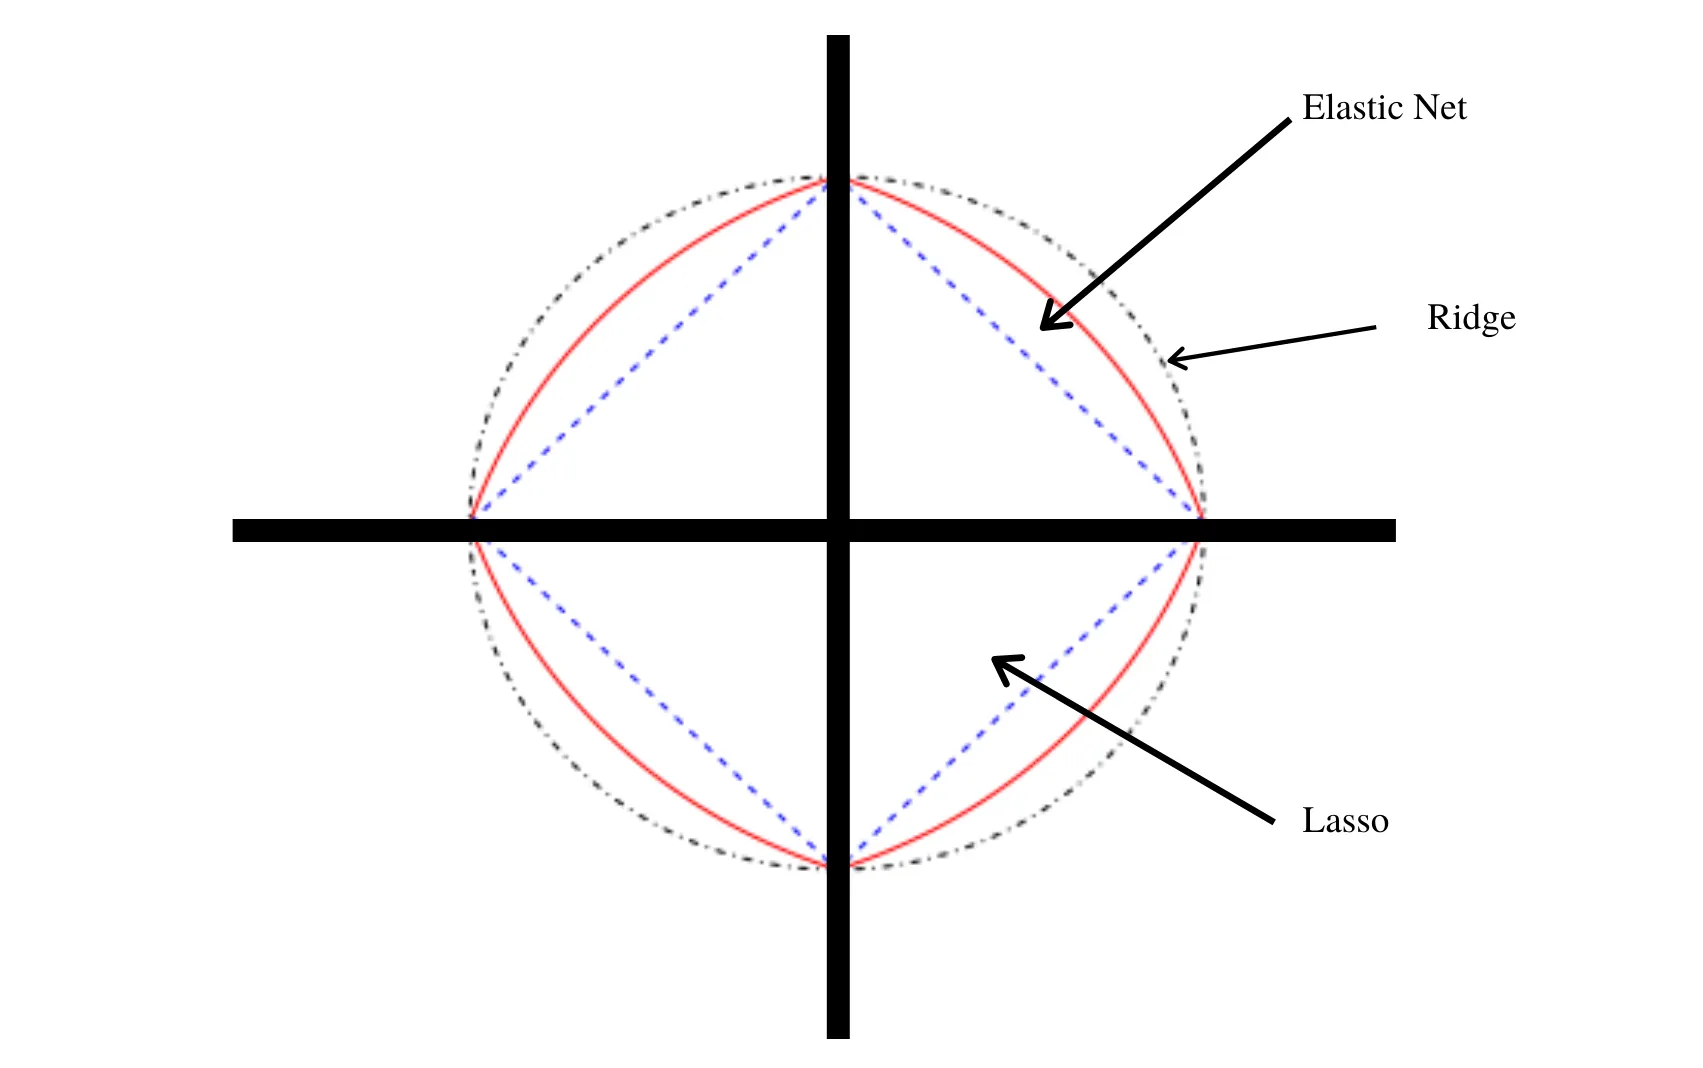

Other forms of regularization include - 
- Dropout
- Spectral Norm of weight matrices
- Regularizing the Lipschitzness of the model, etc.

## Implicit Regularization Effect

This effect comes from the fact that the optimizers imposes *structures* on the parameters on top of the regularized loss.

For the case of linear/logistic regression the loss curve is convex with single global minima, so the optimizers cannot find any minima other than the global minima. 

But for the case of more sofisticated models (e.g. deep learning models), the loss function may contain more than one global minima, and the different optimizers bias towards finding a certain different minima. For e.g. an optimizer may be more biased towards finding the minima that leeds to increased lipschitzness of the model.

$\therefore$ Choice of optimizer - 
- Reduces the training loss to find the global minima.
- Induces implicit regularization that affects the generalization of the model.
- May need to tune the optimizer to improve the generalization error.

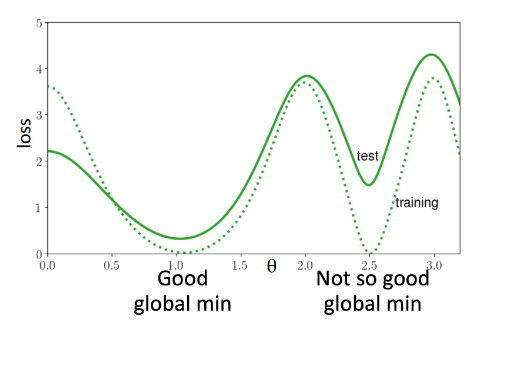

#### Rule of Thumb for better generalization error -
- larger initial learning rate
- smaller initialization 
- smaller batch size 
- momentum 
- inducing stochasticity in optimization process
- try to achieve flatter global minima

## Model Selection by Cross Validation 
